In [3]:
import sys
from pathlib import Path
import pandas as pd
sys.path.append('../src')
import sql

In [27]:
database = 'Salmonella_enterica_with_training'
loci = sql.load_table(database, 'loci')
locus_meta = sql.load_table(database, 'locus_meta')
alleles = sql.load_table(database, 'alleles')
pairs = sql.load_table(database, 'pairs')

refseqs = loci.merge(alleles, left_on='ref_allele', right_on='allele_id').drop(['ref_allele', 'allele_id', 'count'], axis=1)
refseqs = refseqs.merge(locus_meta).drop(['num_sequences', 'is_paralog'], axis=1)

In [29]:
refseqs.to_csv('/media/Access/2_Research/03_cgMLST/Salmonella_enterica_web/reference_locus_metadata.csv', index=False)

In [3]:
def fn(path):
    df = pd.read_csv(Path(path, 'pan_genome_info.txt'), sep='\t', usecols=['occurrence'])
    X = df[df['occurrence']>=0]
    with plt.style.context('ggplot'):
        fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
        plot_gene_distribution(X, ax=ax)
        ax.set_xticks(list(range(0, 101, 10)) + [95])
        ax.set_title("Genome coverage distribution", fontsize=22)
    fig_file = Path(path, 'genome_coverage.png')
    fig.savefig(fig_file, facecolor='w', dpi=300, bbox_inches='tight')
    X = df[df['occurrence']>=5]
    with plt.style.context('ggplot'):
        fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
        plot_gene_distribution(X, ax=ax)
        ax.set_xticks(list(range(0, 101, 10)) + [95])
        ax.set_title("Genome coverage distribution", fontsize=22)
    fig_file = Path(path, 'genome_coverage_5_prec.png')
    fig.savefig(fig_file, facecolor='w', dpi=300, bbox_inches='tight')

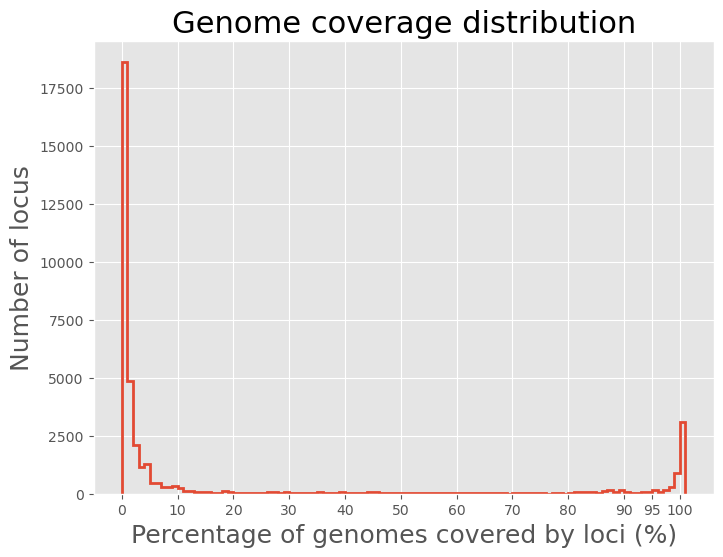

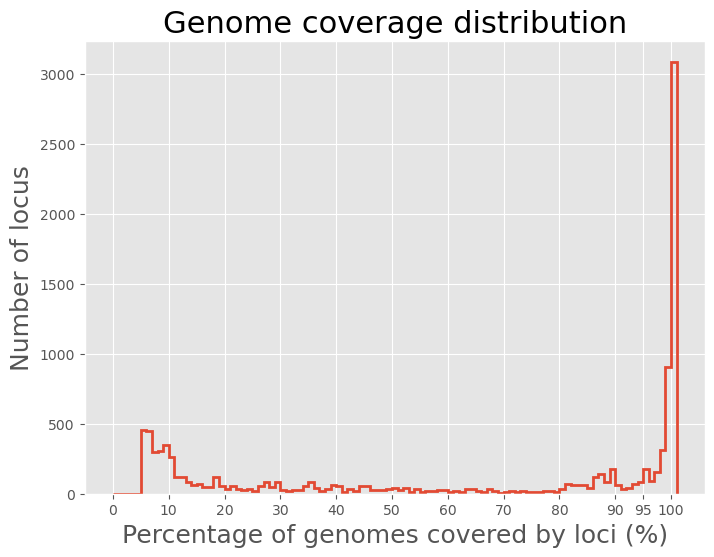

In [5]:
fn('/media/Central_Lab_Storage/bo-han/Database/Burkholderia_cepacia/')

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [4]:
df = pd.read_csv('/media/Access/2_Research/03_cgMLST/Ecoli／Shigella/reference_locus_metadata.csv', sep=',')

In [5]:
df = df.sort_values('occurrence', ascending=False)

In [8]:
df.loc[:, 'locus_tag'] = [f"ECShi{idx:05}" for idx, _ in enumerate(df['locus_id'], 1)]

In [9]:
df

,locus_id,occurrence,dna_seq,peptide_seq,num_isolates,is_core,accession,locus_tag
392,ftsQ,100.00,ATGTCGCAGGCTGCTCTGAACACGCGAAATAGCGAAGAAGAGGTTT...,MSQAALNTRNSEEEVSSRRNNGTRLAGILFLLTVLTTVLVSGWVVL...,1674,True,EC_0073,ECShi00001
671,group_7159,100.00,GTGAAGTTCAAAGTTATCGCCCTGGCGGCATTAATGGGTATTAGCG...,VKFKVIALAALMGISGMAAQANELPDGPHIVTSGTASVDAVPDIAT...,1674,True,EC_0044,ECShi00002
524,acpS,100.00,ATGGCAATATTAGGTTTAGGCACGGATATCGTAGAGATCGCTCGCA...,MAILGLGTDIVEIARIEAVIARSGERLARRVLSDNEWAIWKTHHQP...,1674,True,EC_0039,ECShi00003
428,aroE,100.00,ATGGAAACCTATGCTGTTTTTGGTAATCCGATAGCCCACAGCAAAT...,METYAVFGNPIAHSKSPFIHQQFAQQLNIEHPYGRVLAPINDFINT...,1674,True,EC_0006,ECShi00004
380,cydB,100.00,ATGATCGATTATGAAGTATTGCGTTTTATCTGGTGGCTGCTGGTTG...,MIDYEVLRFIWWLLVGVLLIGFAVTDGFDMGVGMLTRFLGRNDTER...,1674,True,EC_0022,ECShi00005
...,...,...,...,...,...,...,...,...
31660,group_28137,0.06,ATGATTCATTCATTTGAAGAAAAAAATCTTGAGAAGTTATTTACGA...,MIHSFEEKNLEKLFTSGKSQSGLPTDITNSLKRALNELHAAGSEAD...,1,NaN,NaN,ECShi41324
31661,group_28138,0.06,ATGTCAGCTAACTTTAATTGTCAGATTGTTTCTACCGAACAGAGTG...,MSANFNCQIVSTEQSEAVITGEDAVTTILEQLESAGIQVESQCRSG...,1,NaN,NaN,ECShi41325
31662,group_28139,0.06,ATGGCAAGTAAAGGTATTGAAAAATTAGTCTCTGAGGCATGTAAAA...,MASKGIEKLVSEACKKGYSVFRKGDRIEICKPNRKMVRLVILPDGT...,1,NaN,NaN,ECShi41326
31663,group_28140,0.06,ATGTCCGACCATGTGAAGTTTTATGATTACTATATTGTGGAAGGGC...,MSDHVKFYDYYIVEGPEVQALIESFEPISQKRSELIKEAMTLVEAV...,1,NaN,NaN,ECShi41327


In [10]:
df.to_csv('/media/Access/2_Research/03_cgMLST/Ecoli／Shigella/reference_locus_metadata.csv', index=False)

In [11]:
df = pd.read_csv('/media/Access/2_Research/03_cgMLST/Ecoli／Shigella/reference_locus_metadata.csv', sep=',')

In [12]:
df = df[df['occurrence']>=95]
df.shape

(2481, 8)

In [13]:
records = []
for i, j, k in zip(df['locus_tag'], df['locus_id'], df['peptide_seq']):
    record = SeqRecord(Seq(k), id=i, description=j)
    records.append(record)

In [14]:
SeqIO.write(records, '/media/GenomicResearch/Issue/Benga/Escherichia_coli_and_Shigella.faa', 'fasta')

2481

In [56]:
df = pd.read_csv('/media/Central_Lab_Storage/bo-han/Database/Neisseria_meningitidis/pan_genome_info.txt', sep='\t')

In [57]:
df[df['occurrence']>=95]

,Gene,Annotation,No. isolates,occurrence,Nucleotide,Peptide
0,Hgd,2-(hydroxymethyl)glutarate dehydrogenase,202,100.000000,ATGTCCGCAAACGAATACACACAAATCGGCTGGATAGGCTTAGGGC...,MSANEYTQIGWIGLGQMGLPMVTRLLDGGIEVGVYNRSPDKTAPIS...
1,PGdx,Hybrid peroxiredoxin hyPrx5,202,100.000000,ATGGCTTTGCAAGATCGTACCGGTCAAAAAGTACCTTCCGTAGTAT...,MALQDRTGQKVPSVVFRTRVGDTWKDVSTDDLFKGKKVVVFSLPGA...
3,abgT,p-aminobenzoyl-glutamate transport protein,199,98.514851,ATGAGTCAAACCGATACGCAACGGGACGGACGATTTTTACGCACAG...,MSQTDTQRDGRFLRTVEWLGNMLPHPVTLFIIFIVLLLIASAAGAY...
4,accA,Acetyl-coenzyme A carboxylase carboxyl transfe...,202,100.000000,ATGAAACCTGTTTTTTTGGATTTTGAACAACCCATAGCCGAACTGA...,MKPVFLDFEQPIAELTNKIDELRFVQDESAVDISDEIHRLQKKSND...
6,accC,Biotin carboxylase,202,100.000000,ATGCTGAAAAAAGTTTTAATCGCCAACCGAGGCGAAATCGCATTAC...,MLKKVLIANRGEIALRVLRACREMGIATVAVHSEADKDSLHVKLAD...
...,...,...,...,...,...,...
1754,zur,Zinc uptake regulation protein,202,100.000000,ATGAAAACAAATTTCAAACAGAAAATTATCGAACAGGCACGCAGCG...,MKTNFKQKIIEQARSEGLQVTALREQVLDIVLQQSGVIKAYNVLSQ...
1755,zwf,Glucose-6-phosphate 1-dehydrogenase,202,100.000000,ATGAGTACACAAACAAATTTTGATTTGGTGTTGTTCGGTGCGACCG...,MSTQTNFDLVLFGATGDLAMRKLLPCLYQAHVAGLLHPEGRILGVS...
1758,aroD,3-dehydroquinate dehydratase,194,96.039604,ATGTGTTCCTGCCTTGTTGTCAAAAATACCGTTATCGGAAGCGGAC...,MCSCLVVKNTVIGSGRTKIAVPLVARDAAELSAVLEQIKNMPFDIA...
1953,hscA,Chaperone protein HscA,195,96.534653,ATGATGGGCGAGAAAGACGGATTTTATCGGCATTTGGCGGTAGAGG...,MMGEKDGFYRHLAVEGNFGGTAQSLAVCSTIGANSVKMPTSFLYTP...
